<h2 style='color:blue' align='center'>Data Augmentation To Address Overfitting In Flower Classification CNN</h2>

**In this notebook we will build a CNN to classify flower images. We will also see how our model overfits and how overfitting can be addressed using data augmentation. Data augmentation is a process of generating new training samples from current training dataset using transformations such as zoom, rotations, change in contrast etc**

In below image, 4 new training samples are generated from original sample using different transformations

<img src="daisy2.JPG" />

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

We will download flowers dataset from google website and store it locally. In below call it downloads the zip file (.tgz) in cache_dir which is . meaning the current folder

#### Load flowers dataset

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [3]:
data_dir

'.\\datasets\\flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [7]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

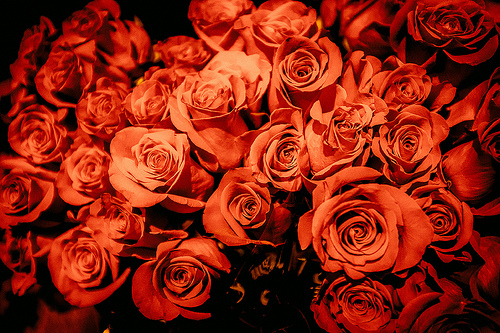

In [8]:
PIL.Image.open(str(roses[2]))

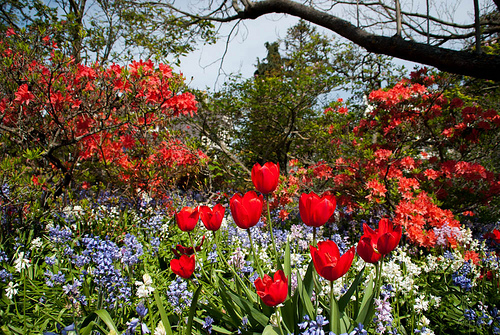

In [9]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[5]))

<h3 style='color:purple'>Read flowers images from disk into numpy array using opencv</h3>

In [10]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [11]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [12]:
flowers_images_dict['roses'][:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [13]:
str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [14]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [15]:
img.shape

(240, 179, 3)

In [16]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [17]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [18]:
X = np.array(X)
y = np.array(y)

<h3 style='color:purple'>Train test split</h3>

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

<h3 style='color:purple'>Preprocessing: scale images</h3>

In [20]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

<h3 style='color:purple'>Build convolutional neural network and train it</h3>

In [21]:
num_classes = 5

model = Sequential([
  layers.Conv2D(20, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(40, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(80, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(200, activation='relu'),
  layers.Dense(100, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)              

Epoch 1/30
86/86 [==============================] - 41s 470ms/step - loss: 1.3332 - accuracy: 0.4172
Epoch 2/30
86/86 [==============================] - 38s 442ms/step - loss: 1.0357 - accuracy: 0.5774
Epoch 3/30
86/86 [==============================] - 38s 447ms/step - loss: 0.8307 - accuracy: 0.6759
Epoch 4/30
86/86 [==============================] - 38s 444ms/step - loss: 0.6489 - accuracy: 0.7551
Epoch 5/30
86/86 [==============================] - 38s 447ms/step - loss: 0.4552 - accuracy: 0.8307
Epoch 6/30
86/86 [==============================] - 38s 439ms/step - loss: 0.2935 - accuracy: 0.9008
Epoch 7/30
86/86 [==============================] - 37s 435ms/step - loss: 0.1942 - accuracy: 0.9328
Epoch 8/30
86/86 [==============================] - 39s 449ms/step - loss: 0.1034 - accuracy: 0.9677
Epoch 9/30
86/86 [==============================] - 40s 465ms/step - loss: 0.0576 - accuracy: 0.9826
Epoch 10/30
86/86 [==============================] - 39s 458ms/step - loss: 0.0295 - accura

In [22]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 3s 82ms/step - loss: 2.6312 - accuracy: 0.6678


[2.631241798400879, 0.6677560210227966]

**Here we see that while train accuracy is very high (99%), the test accuracy is significantly low (65.57%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting**

In [23]:
predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 2s 79ms/step


array([[  3.9545653 ,  29.881807  ,   1.8113276 , -14.040762  ,
         -1.2305274 ],
       [  5.8902845 ,   0.88326705,  -3.6539927 ,  -3.8559158 ,
          0.42152652],
       [ -2.152351  ,   5.431277  ,  17.209738  , -11.147211  ,
         -6.8688774 ],
       ...,
       [ -0.43090898,  -0.7171531 ,  -4.501668  ,   8.9527855 ,
          0.2846267 ],
       [ 18.191103  ,   7.6652875 ,   4.34757   , -13.368757  ,
         -0.75426686],
       [ -1.6588768 , -10.010841  ,  -1.9159478 ,   7.0094576 ,
          8.139953  ]], dtype=float32)

In [24]:
score = tf.nn.softmax(predictions[0])

In [25]:
np.argmax(score)

1

In [26]:
y_test[0]

1

<h3 style='color:purple'>Improve Test Accuracy Using Data Augmentation</h3>

In [27]:
img_height = 180
img_width = 180
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

**Original Image**

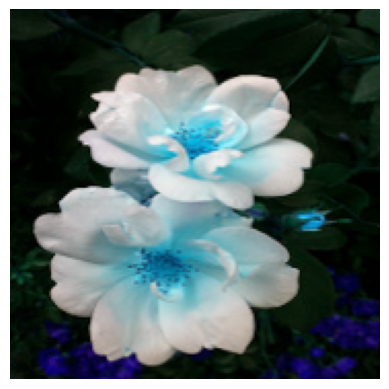

In [28]:
plt.axis('off')
plt.imshow(X[0])

**Newly generated training sample using data augmentation**

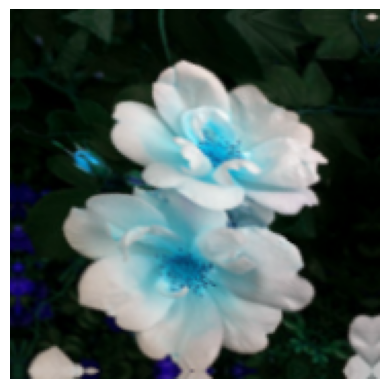

In [29]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

<h3 style='color:purple'>Train the model using data augmentation and a drop out layer</h3>

In [30]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)    

Epoch 1/30
86/86 [==============================] - 35s 378ms/step - loss: 1.2882 - accuracy: 0.4608
Epoch 2/30
86/86 [==============================] - 33s 384ms/step - loss: 1.0343 - accuracy: 0.5879
Epoch 3/30
86/86 [==============================] - 34s 400ms/step - loss: 0.9221 - accuracy: 0.6370
Epoch 4/30
86/86 [==============================] - 34s 390ms/step - loss: 0.8422 - accuracy: 0.6748
Epoch 5/30
86/86 [==============================] - 14463s 170s/step - loss: 0.8048 - accuracy: 0.6875
Epoch 6/30
86/86 [==============================] - 35s 408ms/step - loss: 0.7593 - accuracy: 0.7071
Epoch 7/30
86/86 [==============================] - 35s 402ms/step - loss: 0.6970 - accuracy: 0.7409
Epoch 8/30
86/86 [==============================] - 41s 475ms/step - loss: 0.6511 - accuracy: 0.7471
Epoch 9/30
86/86 [==============================] - 44s 507ms/step - loss: 0.5985 - accuracy: 0.7787
Epoch 10/30
86/86 [==============================] - 44s 510ms/step - loss: 0.5582 - accu

In [31]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 2s 63ms/step - loss: 1.1541 - accuracy: 0.7309


[1.1541496515274048, 0.7309368252754211]

**You can see that by using data augmentation and drop out layer the accuracy of test set predictions is increased to 73.74%**